#### **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from tqdm import tqdm

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 3**

In [2]:
island_size = 5 # Radius

##### **Problem 3a**

In [3]:
def is_inside_circle(x, y, radius=island_size):
    return x**2 + y**2 < radius**2

def comp_distance_to_edge(x, y, direction, island_size):
    ''' This is a function used to find the distance from a crab's position
        to the edge of the circle. To be used in the case where a crab nears
        the island's edge '''
    dx = np.cos(direction)
    dy = np.sin(direction)
    
    A = dx**2 + dy**2
    B = 2 * (x * dx + y * dy)
    C = x**2 + y**2 - island_size**2
    
    discriminant = B**2 - 4 * A * C
    if discriminant >= 0:
        t1 = (-B - np.sqrt(discriminant)) / (2 * A) # Two solutions
        t2 = (-B + np.sqrt(discriminant)) / (2 * A)
        
        t = min(filter(lambda t: t >= 0, [t1, t2]), default=0) # Take the smallest possible value
        return t

def move_crab(x,y): # Simulate a single day's step of a crab
    
    direction = np.random.uniform(0,2*np.pi) # Get a random direction

    x_change = 0.2 * np.cos(direction)
    y_change = 0.2 * np.sin(direction)

    if is_inside_circle(x+x_change,y+y_change): # Check if it is still inside the circle
        return x+x_change,y+y_change # Update position
    
    else: # If not, then compute distance to the edge and use that distance
        distance_to_edge = comp_distance_to_edge(x=x,y=y,direction=direction,island_size=island_size)
        
        x_change = distance_to_edge * np.cos(direction)
        y_change = distance_to_edge * np.sin(direction)
        
        return x+x_change,y+y_change # Update position with shorter distance

In [4]:
x , y = 3.6 , -2 # Generate crab initial position

days = 200

x_coords , y_coords = [3.6] , [-2]

for day in range(days):
    x , y = move_crab(x,y)
    x_coords.append(x)
    y_coords.append(y)

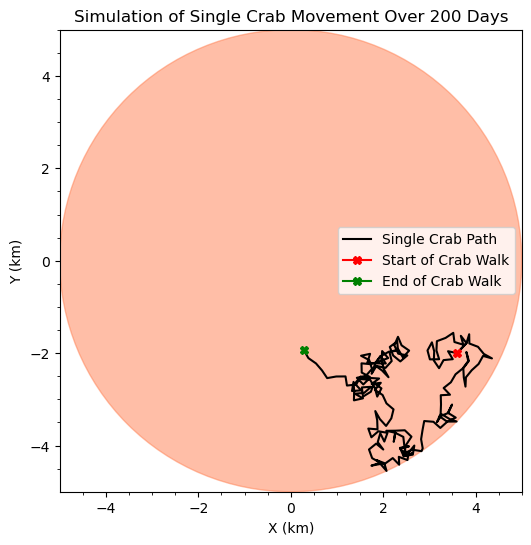

In [5]:
island = plt.Circle((0, 0), island_size, color='coral', alpha=0.5)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_artist(island)
ax.plot(x_coords, y_coords, color='k',linestyle='-', label='Single Crab Path')
ax.plot(x_coords[0],y_coords[0],color='red',marker='X',label='Start of Crab Walk')
ax.plot(x_coords[-1],y_coords[-1],color='green',marker='X',label='End of Crab Walk')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
ax.set_xlim(-island_size, island_size)
ax.set_ylim(-island_size, island_size)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Simulation of Single Crab Movement Over 200 Days')
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##### **Problem 3b**

In [6]:
def modified_move_crab(x,y):
    
    direction = np.random.uniform(0,2*np.pi) # Get a random direction

    x_change = 0.2 * np.cos(direction)
    y_change = 0.2 * np.sin(direction)

    if is_inside_circle(x+x_change,y+y_change): # Check if it is still inside the circle
        distance = np.sqrt(x_change**2 + y_change**2) # Compute the distance as well
        return x+x_change,y+y_change,distance,0 # Raise a 0 if no edge 
    
    else: # If not, then compute distance to the edge and use that distance
        
        distance_to_edge = comp_distance_to_edge(x=x,y=y,direction=direction,island_size=island_size)
        
        x_change = distance_to_edge * np.cos(direction)
        y_change = distance_to_edge * np.sin(direction)
        
        distance = np.sqrt(x_change**2 + y_change**2) # Compute the distance as well
        
        return x+x_change,y+y_change,distance,1 # Raise a 1 if an edge was encountered

In [7]:
list_of_runs = []

pseudo_experiments = 501

for experiment in range(pseudo_experiments):
    
    x , y = 3.6 , -2 # Generate crab initial position

    days = 10000 # Set the days to something large

    x_coords , y_coords , distances = [3.6] , [-2] , [] 

    for day in range(days): 
        x , y , distance, edge = modified_move_crab(x,y)
        if edge == 0:
            x_coords.append(x)
            y_coords.append(y)
            distances.append(distance) # Get the distance
        else: break
        
    list_of_runs.append(np.sum(distances))

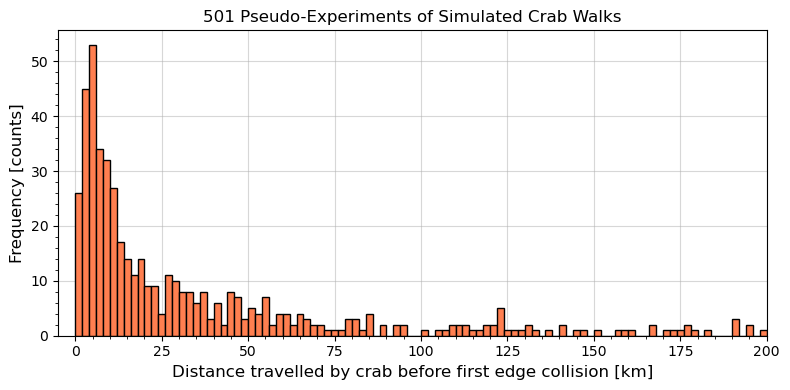

In [8]:
plt.figure(figsize = (8,4))

plt.hist(list_of_runs,bins=np.arange(0,201.,2),density=False,color='coral',edgecolor='black')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('501 Pseudo-Experiments of Simulated Crab Walks',fontsize=12)
plt.xlabel('Distance travelled by crab before first edge collision [km]',fontsize=12)
plt.ylabel('Frequency [counts]',fontsize=12)
plt.xlim(-5,200)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.savefig('Problem3_Fig3b.pdf')
plt.tight_layout()

##### **Problem 3c**

In [9]:
crab_death_radius = 0.175 # Set the radius of a crab fighting another crab
total_crab_mass = 20. # Total mass of all crabs in kg 

def win_crab_duel(mass_1,mass_2): # Function for checking if a duel is won
    probability_of_crab1_win = mass_1**2 / (mass_1**2 + mass_2**2)
    random_probability = np.random.uniform(0,1)
    
    if probability_of_crab1_win > random_probability:
       return True 
    else: False

In [10]:
df_crab_original = pd.read_csv('CrabStartPositions.txt', sep='\s+',header=None)
df_crab_original.columns = ['X','Y'] # Set column names
df_crab_original['Alive'] = 1 # Set all crabs to being alive
df_crab_original['Mass']  = 1 # Set the mass of all crabs to 1

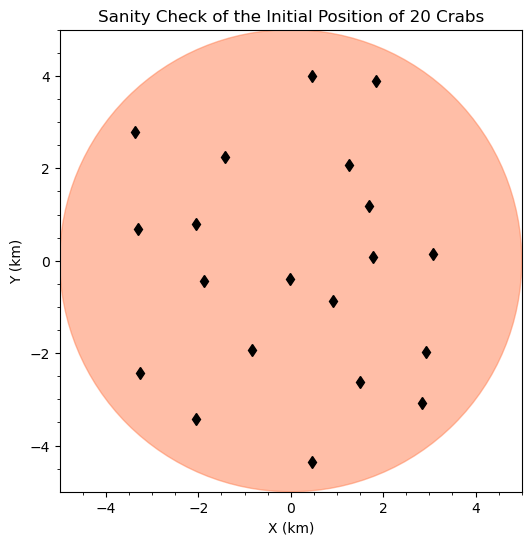

In [11]:
island = plt.Circle((0, 0), island_size, color='coral', alpha=0.5)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_artist(island)
ax.plot(df_crab_original['X'],df_crab_original['Y'], color='k',marker='d',linestyle='')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
ax.set_xlim(-island_size, island_size)
ax.set_ylim(-island_size, island_size)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Sanity Check of the Initial Position of 20 Crabs')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Problem3_Fig3c_sanity.pdf')
plt.show()

New version of fighting

In [12]:
### Parameters of run
days = 200
pseudo_experiments = 2000

In [13]:
crabs = df_crab_original.to_dict('records') # Make a dictionary of the crabs from the dataframe

def simulate_crab_fights(crabs, days, pseudo_experiments): # Made into a function, so it's easier to work with
    Alive_crabs = []
    Heaviest_crab = []
    sanity = [] # List to check that the total mass is always 20

    for experiment in tqdm(range(pseudo_experiments)): # Loop across pseudo-experiments
        crabs_copy = [{**crab} for crab in crabs] # Reset the crabs for each pseudo-experiment
        
        for day in range(days): # Loop across the 200 days
            unique_crab_duels = set() # Make a set for recording unique crab fights
            
            for i, crab in enumerate(crabs_copy): # Move every crab
                if crab['Alive']: # Only move alive crabs
                    crab_move_x, crab_move_y = move_crab(crab['X'], crab['Y'])
                    crab['X'], crab['Y'] = crab_move_x, crab_move_y
            
            for i, crab1 in enumerate(crabs_copy): # Fighting mechanism
                if crab1['Alive']: # Check if alive
                    potential_opponents = [] # List for noting possible opponents
                    for j, crab2 in enumerate(crabs_copy):
                        if i != j and crab2['Alive']: # Only fight non-self and alive crabs
                            distance = np.sqrt((crab2['X'] - crab1['X'])**2 + (crab2['Y'] - crab1['Y'])**2)
                            if distance <= 0.175: # Check range
                                potential_opponents.append((j, distance)) # Add the crab index and distance
                    
                    potential_opponents.sort(key=lambda x: x[1])  # Sort enemy crabs by distance
                    
                    for j, _ in potential_opponents: # Loop across enemy crabs (only the index is important)
                        crab_pair = tuple(sorted([i, j])) # Note the pair
                        if crab_pair not in unique_crab_duels and win_crab_duel(crab1['Mass'], crabs_copy[j]['Mass']):
                            crab_2_mass = crabs_copy[j]['Mass']
                            crabs_copy[i]['Mass'] += crab_2_mass
                            crabs_copy[j]['Alive'] -= 1
                            crabs_copy[j]['Mass'] -= crab_2_mass 
                            unique_crab_duels.add(crab_pair)

        Alive_crabs.append(sum(crab['Alive'] for crab in crabs_copy))
        Heaviest_crab.append(max(crab['Mass'] for crab in crabs_copy))
        sanity.append(sum(crab['Mass'] for crab in crabs_copy))

    return Alive_crabs, Heaviest_crab , sanity

In [14]:
# F I G H T
Alive_list,Mass_list,sanity = simulate_crab_fights(crabs=crabs,days=days,pseudo_experiments=pseudo_experiments)

100%|██████████| 2000/2000 [06:33<00:00,  5.08it/s]


In [15]:
print(f'The median of alive crabs is {np.median(Alive_list)}. The median of heaviest crabs is {np.median(Mass_list)}')

The median of alive crabs is 12.0. The median of heaviest crabs is 4.0


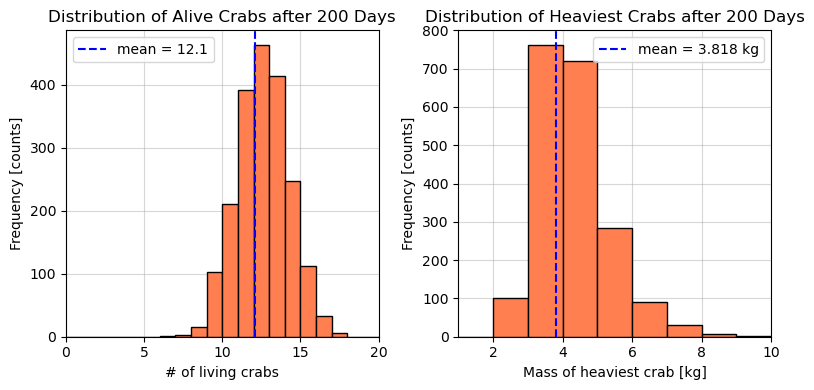

In [16]:
fig, axs = plt.subplots(1,2,figsize=(8, 4))

axs[0].hist(Alive_list,bins=np.arange(0,21,1),density=False,color='coral',edgecolor='black')
axs[0].set_title('Distribution of Alive Crabs after 200 Days')
axs[0].set_xlabel('# of living crabs')
axs[0].set_ylabel('Frequency [counts]')
axs[0].set_xlim(0,20)
axs[0].axvline(x=np.mean(Alive_list),color='blue',linestyle='--',label=f'mean = {np.mean(Alive_list):.4}')


axs[1].hist(Mass_list,bins=np.arange(0,21,1),density=False,color='coral',edgecolor='black')
axs[1].set_title('Distribution of Heaviest Crabs after 200 Days')
axs[1].set_xlabel('Mass of heaviest crab [kg]')
axs[1].set_ylabel('Frequency [counts]')
axs[1].set_xlim(1,10)
axs[1].axvline(x=np.mean(Mass_list),color='blue',linestyle='--',label=f'mean = {np.mean(Mass_list):.4} kg')

axs[0].grid(True,alpha=0.5,zorder=0)
axs[0].set_axisbelow(True)
axs[1].grid(True,alpha=0.5,zorder=0)
axs[1].set_axisbelow(True)
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.savefig('Problem3_Fig3c_dist.pdf')

Old version of crab fighting (uses dataframe and is extremely slow)

In [17]:
Alive_crabs , Heaviest_crab = [] , []

for experiment in tqdm(range(1)): # Loop through pseudo-experiments
    df_crab = df_crab_original.copy() # Make a copy of the original df (ie. reset for experiment)

    for day in range(days): # Loop through days
        
        unique_crab_duels = set()  # Set for keeping track of unique fights
        
        # Move every crab
        for index, row in df_crab.iterrows():
            crab_move_x, crab_move_y = move_crab(row['X'], row['Y'])
            df_crab.loc[index, 'X'] = crab_move_x
            df_crab.loc[index, 'Y'] = crab_move_y
        
        # Loop over every crab
        for index_1, crab_1 in df_crab.iterrows():
            if crab_1['Alive'] == 1:  # Only proceed if crab_1 is alive
                potential_opponents = []
                
                # Collect potential opponents and distances
                for index_2, crab_2 in df_crab.iterrows():
                    if index_1 != index_2 and crab_2['Alive'] == 1:  # Ensure crab_2 is different and alive
                        distance = np.sqrt((crab_2['X'] - crab_1['X'])**2 + (crab_2['Y'] - crab_1['Y'])**2)
                        if distance <= 0.175:
                            potential_opponents.append((index_2, distance))
                
                # Sort potential opponents by distance
                potential_opponents.sort(key=lambda x: x[1])
                
                # Loop through sorted potential opponents
                for opponent_info in potential_opponents: # Loop through enemy crabs 
                    index_2, _ = opponent_info
                    crab_pair = tuple(sorted([index_1, index_2])) # Make crab pair
                    
                    if crab_pair not in unique_crab_duels:  # Check if crabs have previously fought
                        crab_2 = df_crab.loc[index_2] # 
                        if win_crab_duel(crab_1['Mass'], crab_2['Mass']):
                            crab_2_mass = crab_2['Mass']
                            df_crab.loc[index_1, 'Mass'] += crab_2_mass
                            df_crab.loc[index_2, 'Alive'] -= 1  # Mark crab_2 as not alive
                            df_crab.loc[index_2, 'Mass'] -= crab_2_mass
                            unique_crab_duels.add(crab_pair)  # Mark this fight as occurred
    
    Alive_crabs.append(np.sum(df_crab['Alive']))
    Heaviest_crab.append(np.max(df_crab['Mass']))

100%|██████████| 1/1 [00:10<00:00, 10.17s/it]


##### **Problem 3d**

In [18]:
def modified_simulate_crab_fights(crabs, pseudo_experiments): # Modification
    results = []  # Store results for each experiment: days until 10 crabs remain

    for experiment in tqdm(range(pseudo_experiments)):
        # Reset the crabs for each experiment
        crabs_copy = [{**crab} for crab in crabs]  # Deep copy of crabs
        day = 0
        
        while True:
            unique_crab_duels = set()
            day += 1  # Increment day at the start of each loop
            
            # Move every crab
            for i, crab in enumerate(crabs_copy):
                if crab['Alive']:
                    crab_move_x, crab_move_y = move_crab(crab['X'], crab['Y'])
                    crab['X'], crab['Y'] = crab_move_x, crab_move_y
            
            # Fight logic
            for i, crab1 in enumerate(crabs_copy):
                if crab1['Alive']:
                    for j, crab2 in enumerate(crabs_copy):
                        if i != j and crab2['Alive']:
                            crab_pair = tuple(sorted([i, j]))
                            if crab_pair not in unique_crab_duels:
                                distance = np.sqrt((crab2['X'] - crab1['X'])**2 + (crab2['Y'] - crab1['Y'])**2)
                                if distance <= 0.175 and win_crab_duel(crab1['Mass'], crab2['Mass']):
                                    crabs_copy[i]['Mass'] += crabs_copy[j]['Mass']
                                    crabs_copy[j]['Alive'] = 0  # Mark crab2 as not alive
                                    crabs_copy[j]['Mass'] = 0
                                    unique_crab_duels.add(crab_pair)
            
            # Check for the number of alive crabs
            alive_count = sum(1 for crab in crabs_copy if crab['Alive'])
            if alive_count <= 10:
                results.append(day)  # Record the day when only 10 crabs remain
                break  # Exit the loop for this pseudo-experiment
    
    return results


In [19]:
crabs = df_crab_original.to_dict('records')  # Convert DataFrame to list of dictionaries
results = modified_simulate_crab_fights(crabs, pseudo_experiments)

lower_bound = np.percentile(results, (1-0.6827)/2 * 100)
upper_bound = np.percentile(results, ( 1-(1-0.6827)/2 )* 100)
print(f'Lower bound is {lower_bound} days and upper bound is {upper_bound} days')

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [12:13<00:00,  2.72it/s]

Lower bound is 200.14135000000005 days and upper bound is 385.0 days


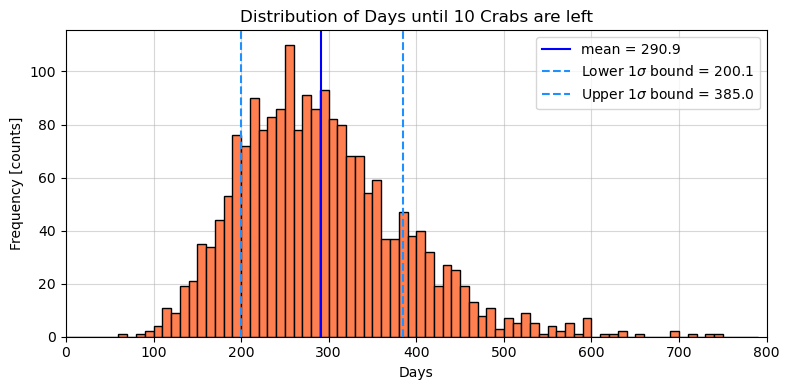

In [20]:
fig, axs = plt.subplots(1,1,figsize=(8, 4))

axs.hist(results,bins=np.arange(0,800,10),density=False,color='coral',edgecolor='black')
axs.set_title('Distribution of Days until 10 Crabs are left')
axs.set_xlabel('Days')
axs.set_ylabel('Frequency [counts]')
axs.set_xlim(0,800)
axs.axvline(x=np.mean(results),color='blue',linestyle='-',label=f'mean = {np.mean(results):.4}')
axs.axvline(x=lower_bound,color='dodgerblue',linestyle='--',label=f'Lower 1$\sigma$ bound = {lower_bound:.4}')
axs.axvline(x=upper_bound,color='dodgerblue',linestyle='--',label=f'Upper 1$\sigma$ bound = {upper_bound:.4}')

axs.grid(True,alpha=0.5,zorder=0)
axs.set_axisbelow(True)
axs.legend()

plt.tight_layout()
plt.savefig('Problem3_Fig3d.pdf')